In [25]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense,Flatten, BatchNormalization, Conv2D, MaxPool2D

np.random.seed(2017)  

In [26]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Image columns: %d"%train_features.shape[2])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


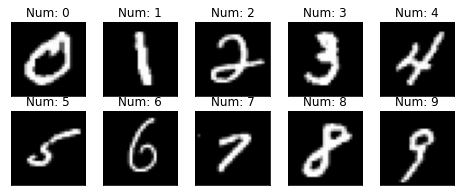

In [27]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

In [28]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [48]:
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model


In [49]:
# define model
model = simple_nn()
# define optimizer
sgd = optimizer=Adam(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# print model information
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [50]:
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=15, verbose=2, validation_split=0.1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/15
844/844 - 5s - loss: 1.3717 - accuracy: 0.6220 - val_loss: 0.7806 - val_accuracy: 0.8417 - 5s/epoch - 6ms/step
Epoch 2/15
844/844 - 4s - loss: 0.6840 - accuracy: 0.8410 - val_loss: 0.4998 - val_accuracy: 0.8883 - 4s/epoch - 5ms/step
Epoch 3/15
844/844 - 3s - loss: 0.5015 - accuracy: 0.8761 - val_loss: 0.3878 - val_accuracy: 0.9050 - 3s/epoch - 4ms/step
Epoch 4/15
844/844 - 3s - loss: 0.4117 - accuracy: 0.8949 - val_loss: 0.3322 - val_accuracy: 0.9147 - 3s/epoch - 4ms/step
Epoch 5/15
844/844 - 3s - loss: 0.3582 - accuracy: 0.9047 - val_loss: 0.2896 - val_accuracy: 0.9237 - 3s/epoch - 4ms/step
Epoch 6/15
844/844 - 3s - loss: 0.3234 - accuracy: 0.9119 - val_loss: 0.2667 - val_accuracy: 0.9243 - 3s/epoch - 4ms/step
Epoch 7/15
844/844 - 3s - loss: 0.2958 - accuracy: 0.9185 - val_loss: 0.2452 - val_accuracy: 0.9308 - 3s/epoch - 4ms/step
Epoch 8/15
844/844 - 3s - loss: 0.2740 - accuracy: 0.9229 - val_loss: 0.2344 - val_accuracy: 0.9330 - 3s/epoch - 4ms/step
Epoch 9/15
844/844 - 4s 

In [51]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

313/313 [==============================] - 1s 2ms/step
Accuracy on test data is: 93.97
